# Testing the luseepy integration

The "Sun" object can be used to either calculate the Sun trajectory based on the time interval, or
read previously produced data from a file. Added a couple of validation plots.

In [1]:
# Imports and utility

# Jupyter magic for autoreload:
%reload_ext autoreload
%autoreload 2

# Test sun trajectory calculation at runtime, NB. may take long!

import numpy as np
import  matplotlib.pyplot as plt
import lusee

# import nav
from nav import * # includes luseepy
# ----------------------------------------------------
print(f'''lusee version: {lusee.__version__}''')



lusee version: 1.2-dev


In [5]:
# Calculate the trajectory at runtime

interval = "2025-02-10 00:00:00 to 2025-02-26 23:45:00"
mySun = Sun()
mySun.calculate(interval)


In [2]:
# Read the prefab data on sun trajectory
import os
from nav import Sun
print('Current directory:', os.getcwd())

mySun = Sun()

cachefile = '../data/2025-02-04_03-07.npy'
mySun.read(cachefile)
print(f'''Number of points read from the file {cachefile}: {mySun.N}''')


Current directory: /home/maxim/projects/lusee/opsim/notebooks
Loaded data from file "../data/2025-02-04_03-07.npy", number of points for the three components: 8979
Number of points read from the file ../data/2025-02-04_03-07.npy: 2993


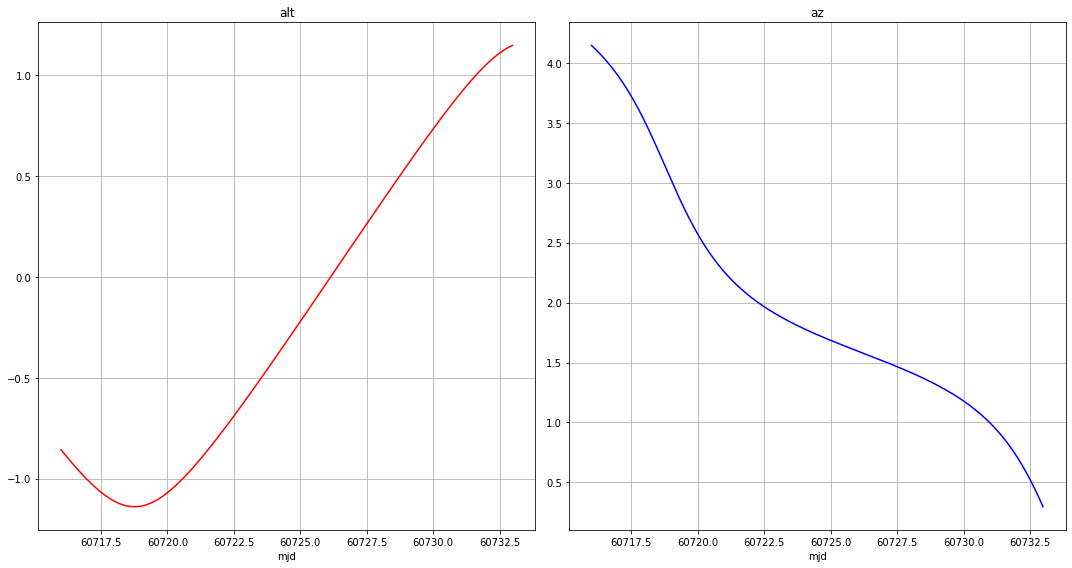

In [6]:
fig, (p1, p2) = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15., 8.]
plt.rcParams["figure.autolayout"] = True

p1.set_title("alt")
p1.plot(mySun.mjd, mySun.alt, color="red")
p1.grid(True)
p1.set_xlabel('mjd')


p2.set_title("az")
p2.plot(mySun.mjd, mySun.az, color="blue")
p2.grid(True)
p2.set_xlabel('mjd')
# plt.title("Time interval: "+interval)
plt.show()


---

Note that the time unit for "hours" is still the same as for other values, in the original case it's 15 min intervals, which is 0.25 hrs

In [8]:
alt = mySun.alt
mjd = mySun.mjd
az  = mySun.az
hrs = mySun.hrsFromSunrise()
print(hrs[0:100]) # test printout

[-387.5  -387.25 -387.   -386.75 -386.5  -386.25 -386.   -385.75 -385.5
 -385.25 -385.   -384.75 -384.5  -384.25 -384.   -383.75 -383.5  -383.25
 -383.   -382.75 -382.5  -382.25 -382.   -381.75 -381.5  -381.25 -381.
 -380.75 -380.5  -380.25 -380.   -379.75 -379.5  -379.25 -379.   -378.75
 -378.5  -378.25 -378.   -377.75 -377.5  -377.25 -377.   -376.75 -376.5
 -376.25 -376.   -375.75 -375.5  -375.25 -375.   -374.75 -374.5  -374.25
 -374.   -373.75 -373.5  -373.25 -373.   -372.75 -372.5  -372.25 -372.
 -371.75 -371.5  -371.25 -371.   -370.75 -370.5  -370.25 -370.   -369.75
 -369.5  -369.25 -369.   -368.75 -368.5  -368.25 -368.   -367.75 -367.5
 -367.25 -367.   -366.75 -366.5  -366.25 -366.   -365.75 -365.5  -365.25
 -365.   -364.75 -364.5  -364.25 -364.   -363.75 -363.5  -363.25 -363.
 -362.75]


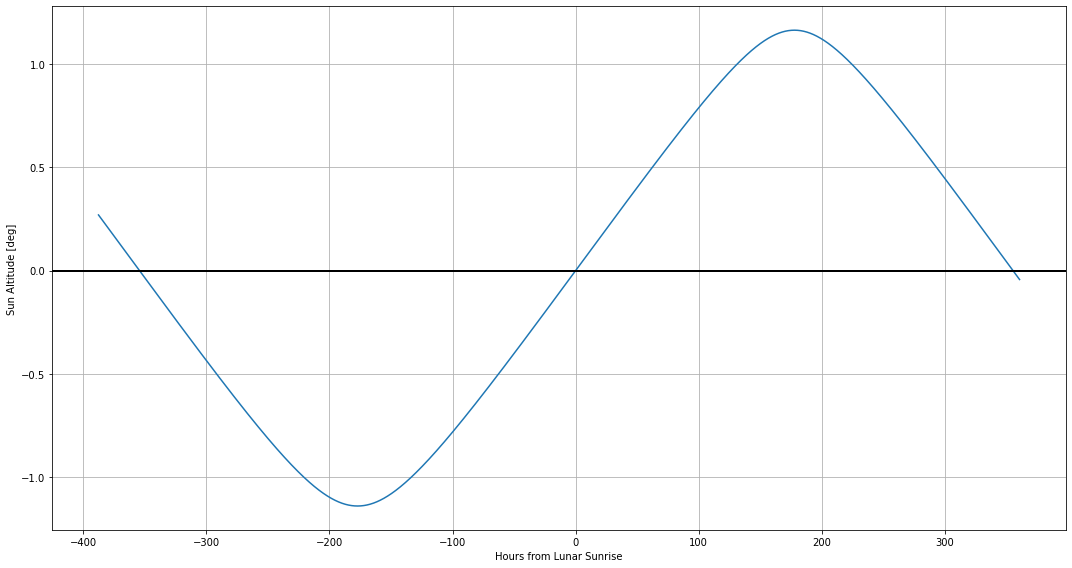

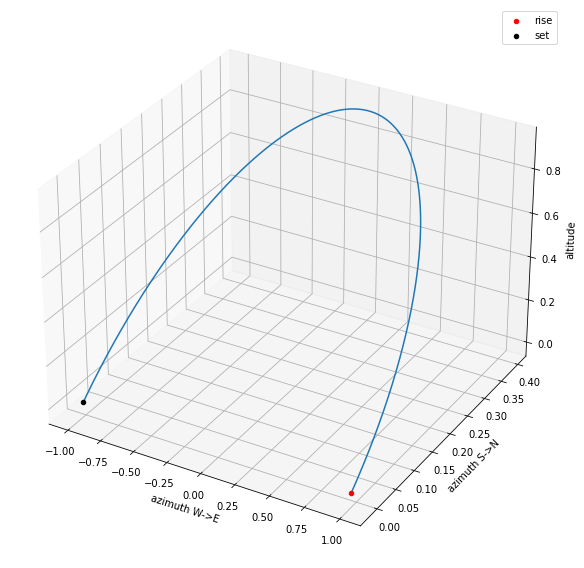

In [7]:

iMidnight       = np.argmin(alt)
iNoon           = np.argmax(alt)
iSundown1       = np.argmin(np.abs(alt[:iMidnight]))
iSunrise        = np.argmin(np.abs(alt[iMidnight:])) + iMidnight
iSundown2       = np.argmin(abs(alt[iNoon:])) + iNoon
hoursFromSunset = (mjd - mjd[iSundown1])*24

t_inc = 0.25 # Varies! But approx 0.25hrs ticks

alt_sun_top     = np.asarray(alt)+0.265
iSuntoprise     = np.argmin(np.abs(alt_sun_top[iMidnight:iNoon])) + iMidnight
iSuntopdown2    = np.argmin(abs(alt_sun_top[iNoon:])) + iNoon

# plot altitude through the cycle
plt.plot(hrs, alt, label='Alt')
plt.axhline(0, c='k', lw=2)
plt.grid(True)
plt.xlabel("Hours from Lunar Sunrise")
plt.ylabel("Sun Altitude [deg]")

# plot track of sun in 3D during 1 lunar day
plt.figure()
ax = plt.axes(projection='3d')
# day_mask = alt > 0
day_mask = [False]*len(alt) | (alt>0)
for i in range(len(day_mask)):
    if (i<iMidnight):
        day_mask[i] = False

# sun = altaz2xyz(alt, az)
sunDay = altaz2xyz(alt, az)[day_mask]

ax.plot3D(sunDay[:,0],sunDay[:,1],sunDay[:,2])
ax.scatter3D(sunDay[0,0],sunDay[0,1],sunDay[0,2], c='r', label='rise')
ax.scatter3D(sunDay[-1,0],sunDay[-1,1],sunDay[-1,2], c='k', label='set')

ax.set_xlabel('azimuth W->E')
ax.set_ylabel('azimuth S->N')
ax.set_zlabel('altitude')
ax.legend()


Text(0.5, 1.0, 'Alt vs Hours to sunrise')

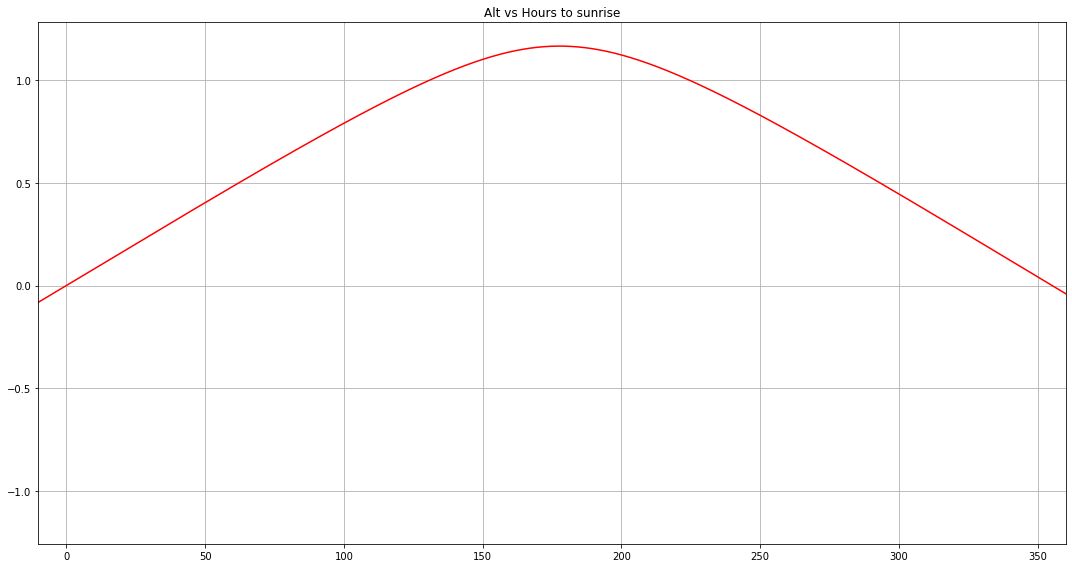

In [14]:

plt.plot(hrs,   alt, color="red",    label="Alt")
plt.xlim(-10, 360)
plt.grid(True)
plt.title("Alt vs Hours to sunrise")

